In [1]:
import numpy as np
import math
import pylab
import random
import pandas as pd
import networkx as nx
from scipy import linalg
from sklearn.datasets import make_sparse_spd_matrix
from sklearn.covariance import GraphLassoCV, ledoit_wolf
import matplotlib.pyplot as plt

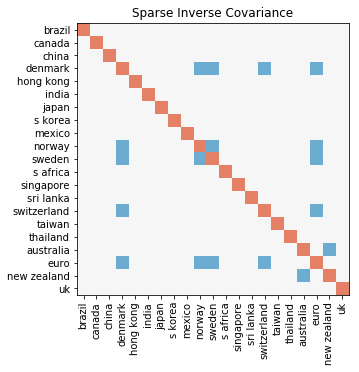

In [2]:
orig = pd.read_csv('1999_2018_complete.csv')
#orig = pd.read_csv('1999_2018_sorted.csv')
orig = orig.drop(orig.columns[range(0,2)],axis=1)
#remove Malaysia
orig = orig.drop(orig.columns[8],axis=1)
#remove Venezuela
orig = orig.drop(orig.columns[21],axis=1)

data = orig[1:]/orig[:-1].values
data = np.log(data)
data = data / np.std(data)
model = GraphLassoCV(alphas=list(np.arange(0.7,2,1)),cv=10,max_iter=5000)
#model = GraphLassoCV(cv=10,max_iter=5000)
#model = GraphLassoCV()

model.fit(data)
inv_mat = pd.DataFrame(model.precision_)
inv_mat.columns = data.columns

g = np.zeros((21,21))
g[model.precision_>0]=0.5
g[model.precision_<-0]=-0.5

plt.figure(figsize=(5, 5))
plt.imshow(g, interpolation="nearest",
           vmax=1, vmin=-1, 
           cmap=plt.cm.RdBu_r)
x_ticks = plt.xticks(range(len(data.columns)), data.columns, rotation=90)
y_ticks = plt.yticks(range(len(data.columns)), data.columns)
plt.title('Sparse Inverse Covariance')
plt.savefig('inv_full.png', bbox_inches='tight')

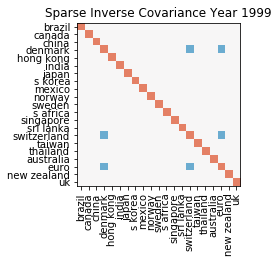

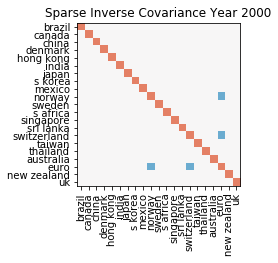

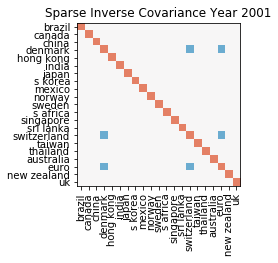

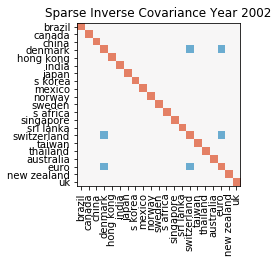

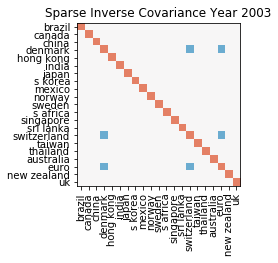

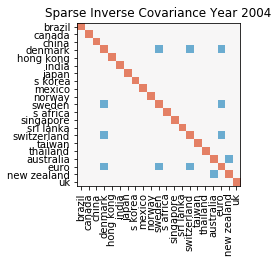

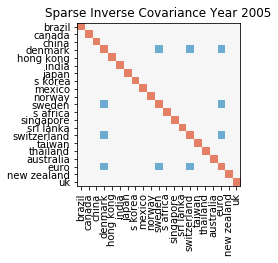

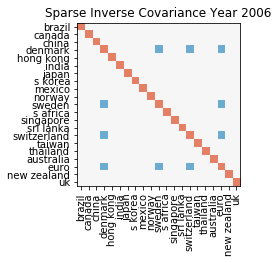

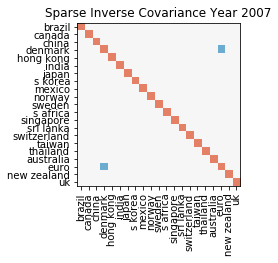

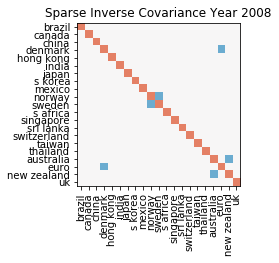

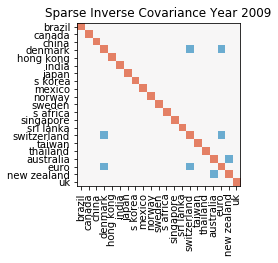

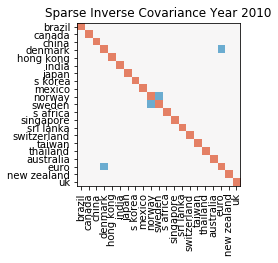

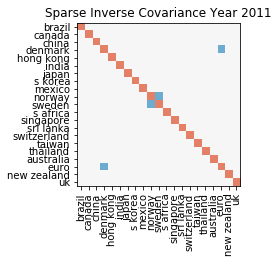

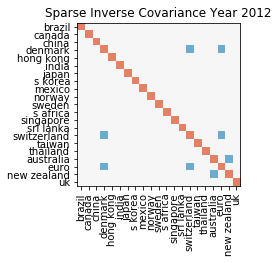

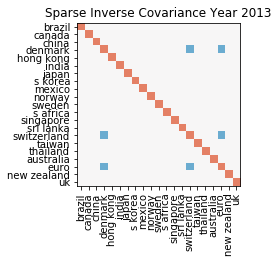

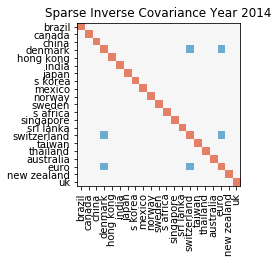

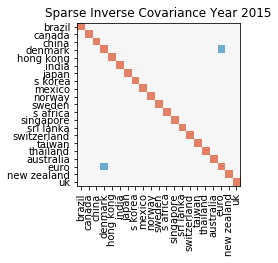

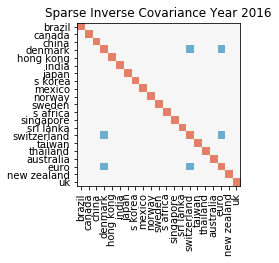

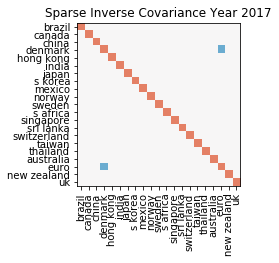

In [3]:
orig = pd.read_csv('1999_2018_complete.csv')
#orig = pd.read_csv('1999_2018_sorted.csv')
orig = orig.drop(orig.columns[range(0,2)],axis=1)
#remove Malaysia
orig = orig.drop(orig.columns[8],axis=1)
#remove Venezuela
orig = orig.drop(orig.columns[21],axis=1)

data = orig[1:]/orig[:-1].values
data = np.log(data)
# ==============================
# Roughly 251 rows in each year
# data.groupby('DATE').count()
# ==============================

for n in range(0,int(len(data.index)/251)):
    a = data.iloc[(n*251):((n+1)*251)]
    a = a / a.std()
    #a.to_csv("norm_year_"+str(n+1)+".csv", sep=',')
    #model = GraphLassoCV(cv=5,max_iter=5000)
    model = GraphLassoCV(alphas=list(np.arange(0.75,2,1)),cv=5,max_iter=5000)
    model.fit(a)
    
    g = np.zeros((21,21))
    g[model.precision_>0.1]=0.5
    g[model.precision_<-0.1]=-0.5

    plt.figure(figsize=(3, 3))
    plt.imshow(g, interpolation="nearest",
           vmax=1, vmin=-1,
            cmap=plt.cm.RdBu_r)
    x_ticks = plt.xticks(range(len(data.columns)), data.columns, rotation=90)
    y_ticks = plt.yticks(range(len(data.columns)), data.columns)
    plt.title('Sparse Inverse Covariance Year '+str(n+1999))
    plt.savefig('inv_'+str(n+1999)+'.png', bbox_inches='tight')
    
    del a
    del g
    del model

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


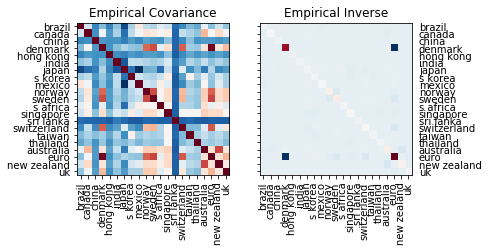

In [4]:
orig = pd.read_csv('1999_2018_complete.csv')
#orig = pd.read_csv('1999_2018_sorted.csv')
orig = orig.drop(orig.columns[range(0,2)],axis=1)
#remove Malaysia
orig = orig.drop(orig.columns[8],axis=1)
#remove Venezuela
orig = orig.drop(orig.columns[21],axis=1)

data = orig[1:]/orig[:-1].values
data = np.log(data)
data = data / np.std(data)

emp_cov = np.dot(data.T, data) / len(data)
emp_inv = linalg.inv(emp_cov)

plt.subplot(1, 2, 1)
plt.plot(figsize=(20, 20))
plt.imshow(emp_cov, interpolation="nearest",
           cmap=plt.cm.RdBu_r)
x_ticks = plt.xticks(range(len(data.columns)), data.columns, rotation=90)
y_ticks = plt.yticks(range(len(data.columns)), data.columns)
#plt.tick_params(axis='y', which='both', labelleft='on', labelright='off')
plt.title('Empirical Covariance')
plt.savefig('emp_cov.png', bbox_inches='tight')

plt.subplot(1, 2, 2)
plt.plot(figsize=(5, 5))
plt.imshow(emp_inv, interpolation="nearest",
           cmap=plt.cm.RdBu_r)
x_ticks = plt.xticks(range(len(data.columns)), data.columns, rotation=90)
y_ticks = plt.yticks(range(len(data.columns)), data.columns)

# this line generates warning message
plt.tick_params(axis='y', which='both', labelleft='off', labelright='on')

plt.title('Empirical Inverse')
plt.savefig('emp_inv.png', bbox_inches='tight')

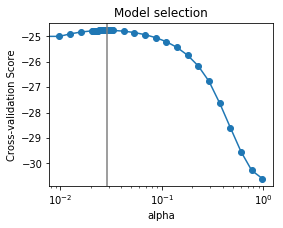

In [5]:
orig = pd.read_csv('1999_2018_complete.csv')
#orig = pd.read_csv('1999_2018_sorted.csv')
orig = orig.drop(orig.columns[range(0,2)],axis=1)
#remove Malaysia
orig = orig.drop(orig.columns[8],axis=1)
#remove Venezuela
orig = orig.drop(orig.columns[21],axis=1)

data = orig[1:]/orig[:-1].values
data = np.log(data)
data = data / np.std(data)

model = GraphLassoCV(alphas=20,max_iter=5000,cv=10)
model.fit(data)
plt.figure(figsize=(4, 3))
#plt.axes([.2, .15, .75, .7])
plt.semilogx(model.cv_alphas_[0:(len(model.grid_scores_))], 
         np.mean(model.grid_scores_[0:(len(model.grid_scores_))],axis=1),
         'o-')
plt.axvline(model.alpha_, color='.5')
plt.title('Model selection')
plt.ylabel('Cross-validation Score')
plt.xlabel('alpha')
plt.savefig('cv_score.png', bbox_inches='tight')

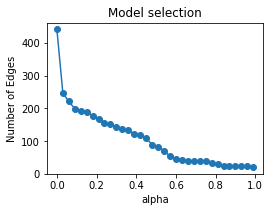

In [6]:
orig = pd.read_csv('1999_2018_complete.csv')
#orig = pd.read_csv('1999_2018_sorted.csv')
orig = orig.drop(orig.columns[range(0,2)],axis=1)
#remove Malaysia
orig = orig.drop(orig.columns[8],axis=1)
#remove Venezuela
orig = orig.drop(orig.columns[21],axis=1)

data = orig[1:]/orig[:-1].values
data = np.log(data)
data = data / np.std(data)

#alphas = np.logspace(-4,0,30)
alphas = np.arange(0,1,0.03)
num_edge = np.zeros(len(alphas))
count = 0

for n in np.arange(0,1,0.03):
    model = GraphLassoCV(alphas=list(np.arange(n,2.001,1)),max_iter=5000,cv=10)
    model.fit(data)
    num_edge[count] = np.count_nonzero(model.precision_)
    count += 1
    del model
    
rm_index = [i for i, e in enumerate(num_edge) if e == 0]
num_edge = np.delete(num_edge,rm_index)
alphas = np.delete(alphas,rm_index)

plt.figure(figsize=(4, 3))
plt.axes([.2, .15, .75, .7])
plt.plot(alphas,num_edge,'o-')
plt.title('Model selection')
plt.ylabel('Number of Edges')
plt.xlabel('alpha')
plt.savefig('edge_stability.png', bbox_inches='tight')

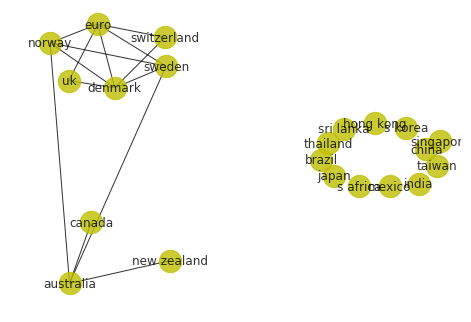

In [7]:
# ==============================================================================================
# Identify community positions
# ==============================================================================================

def community_layout(g, partition):
    pos_communities = _position_communities(g, partition, scale=3)

    pos_nodes = _position_nodes(g, partition, scale=1)

    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=(len(edges)))

    pos_communities = nx.kamada_kawai_layout(hypergraph, **kwargs)

    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):
    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

def test():
    from community import community_louvain

    g = nx.karate_club_graph()
    partition = community_louvain.best_partition(g)
    pos = community_layout(g, partition)

    nx.draw(g, pos, node_color=partition.values()); plt.show()
    return

# ==============================================================================================

orig = pd.read_csv('1999_2018_complete.csv')
orig = orig.drop(orig.columns[range(0,2)],axis=1)
orig = orig.drop(orig.columns[8],axis=1)
orig = orig.drop(orig.columns[21],axis=1)

data = orig[1:]/orig[:-1].values
data = np.log(data)
data = data / np.std(data)
model = GraphLassoCV(alphas=list(np.arange(0.58,2,1)),cv=10,max_iter=5000)

model.fit(data)
inv_mat = pd.DataFrame(model.precision_)
inv_mat.columns = data.columns

links = model.precision_
# remove self correlation
links[links >= 0.99] = 0

G = nx.from_numpy_matrix(links)
new_label = data.columns
old_label = np.arange(0,21)
mapping = dict(zip(old_label, new_label))
G = nx.relabel_nodes(G,mapping)

# ==========================================================
# Create dict mapping between nodes and communities
from networkx.algorithms import community
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
part = sorted(map(sorted, top_level_communities))

indx = 0
group = {}
for n in np.arange(0,len(part),1):
    # independent currencies form a group
    if len(part[n]) == 1:
        group[part[n][0]] = 0
    else:
        for m in np.arange(0,len(part[n]),1):
            group[part[n][m]] = (n+5)*100
# ==========================================================

nx.draw(G,
        community_layout(G, group),
        with_labels=True,
        node_size=500, node_color='y', alpha=0.8, node_shape='o')